In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
sal_data={"line1":[3,3.2, 3.8, 5, 8, 9, 12, 13, 22, 26], 
          "line2": [8, 9, 12, 15, 23, 30, 38 ,46.7, 48, 53]}
df=pd.DataFrame(sal_data)
df.head(33)

line1  line2
0    3.0    8.0
1    3.2    9.0
2    3.8   12.0
3    5.0   15.0
4    8.0   23.0
5    9.0   30.0
6   12.0   38.0
7   13.0   46.7
8   22.0   48.0
9   26.0   53.0

In [8]:
#Создание простой модели линейной регрессии для прогнозирования

In [9]:
X=df[['line1']]
y=df.line2

In [10]:
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [11]:
#Прогноз по модели
#yp - массив для прогнозов

In [12]:
yp=lm.predict(X)
print(yp)

[13.16824619 13.57095963 14.77909993 17.19538054 23.23608206 25.24964924
 31.29035076 33.30391794 51.4260225  59.4802912 ]


In [13]:
#прогноз и фактические данные на одном графике

In [15]:
from bokeh.plotting import figure, show, output_file
p=figure(title="Actual vs Predicted", width=450, height=300)
p.title.align = 'center'
p.circle(df.line1, df.line2)
p.line(df.line1, df.line2, legend_label='Actual', line_width=3, line_alpha=0.4)
p.circle(df.line1, yp, color="red")
p.line(df.line1,yp, color="red",legend_label='Predicted', line_width=3, line_alpha=0.4)
p.xaxis.axis_label = 'line1'
p.yaxis.axis_label = 'line2'
show(p)

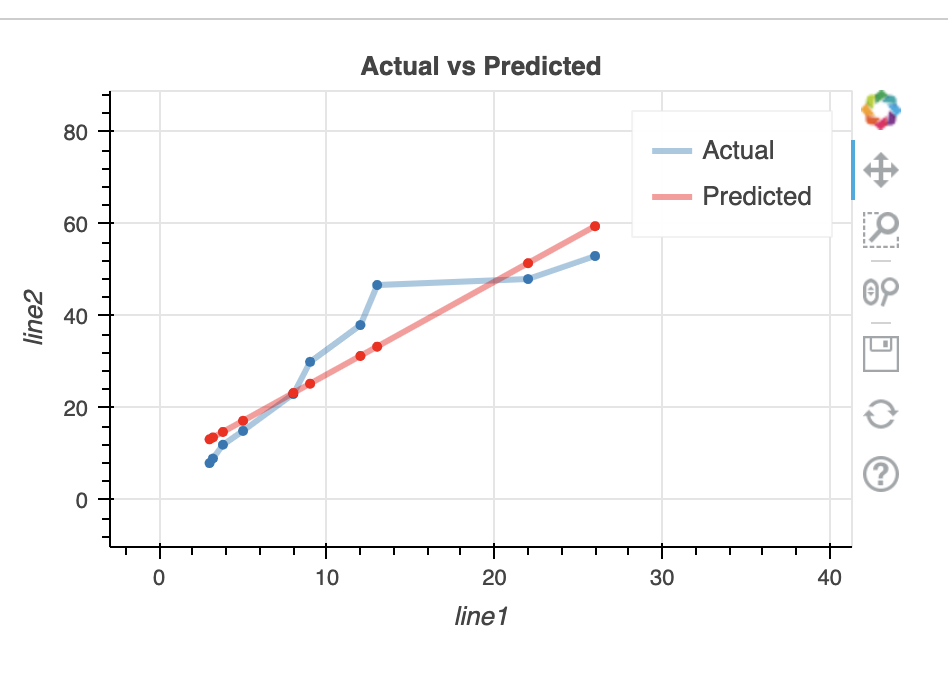

In [ ]:
#Вычисление RMSE (разница между остатками - стат ошибка) с использованием библиотеки

In [16]:
import numpy as np
print(f'Residuals: {y-yp}')
np.sqrt(np.mean(np.square(y-yp)))  
np.mean(abs(y-yp))                 

Residuals: 0    -5.168246
1    -4.570960
2    -2.779100
3    -2.195381
4    -0.236082
5     4.750351
6     6.709649
7    13.396082
8    -3.426023
9    -6.480291
Name: line2, dtype: float64


4.9712164129715415

In [ ]:
#уменьшение стат ошибки с помощью полиномиальной модели

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(y, yp))
mean_absolute_error(y, yp)


4.9712164129715415

In [18]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures() 
X_poly=pf.fit_transform(X) 
lm.fit(X_poly, y)
yp=lm.predict(X_poly)

In [19]:
#RMSE
np.sqrt(np.mean(np.square(y-yp)))
np.mean(abs(y-yp))

1.9191701039913014

In [20]:
from bokeh.plotting import figure, show, output_file
p=figure(title="Actual vs Predicted", width=450, height=300)
p.title.align = 'center'
p.circle(df.line1, df.line2)
p.line(df.line1, df.line2, legend_label='Actual', line_width=3, line_alpha=0.4)
p.circle(df.line1, yp, color="red")
p.line(df.line1,yp, color="red",legend_label='Predicted', line_width=3, line_alpha=0.4)
p.xaxis.axis_label = 'line1'
p.yaxis.axis_label = 'line2'
show(p)

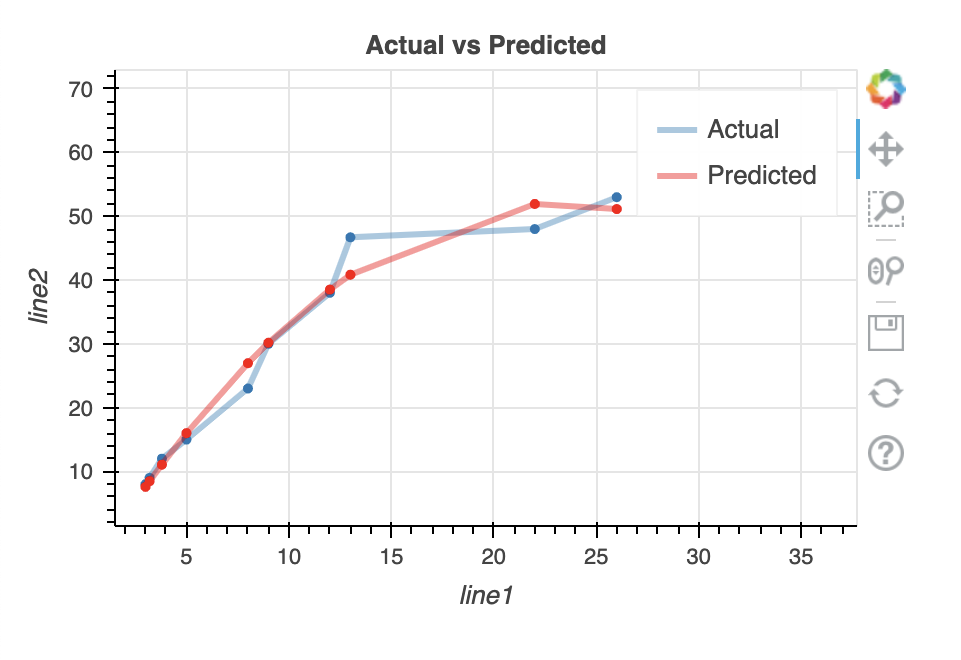

In [ ]:
#разница между фактом и прогнозм уменьшена, модель улучшена

In [21]:
#проверим данные через R квадрат (актуально для регрессионных моделей)
# расчет r2 с использованием sklearn 
from sklearn.metrics import r2_score 
print(r2_score(y, yp)) 

0.9733533370610941


In [ ]:
#R2 = 0.97, а значит предсказуемость модели 97%